# Exploratory Data Analysis 

In [246]:
pip install -r modules.txt

In [421]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pingouin
import seaborn as sns

In [422]:
# import data from TV_Viewing_Profiles and Social_media datasets
viewers_demo = pd.read_csv("data/viewers_demo.csv")
viewers_demo.set_index("year", True)
sports_views = pd.read_csv("data/sports_views_tools.csv")
sports_views.set_index("year", inplace=True)
twitter_users = pd.read_csv("data/twitter_users.csv")
twitter_users.set_index("year", inplace=True)
facebook_users = pd.read_csv('data/facebook_users.csv')
facebook_users.set_index("year", inplace=True)


In [423]:
# import data from sports_apparel dataset
a_age_group = pd.read_csv("Sports_apparel_datasets/age_group.csv")
a_amount_spent = pd.read_csv("Sports_apparel_datasets/amount_spent.csv")
a_average_expenditure = pd.read_csv("Sports_apparel_datasets/average_expenditure.csv")
a_gender = pd.read_csv("Sports_apparel_datasets/gender.csv")
a_geographic_region = pd.read_csv("Sports_apparel_datasets/geographic_region.csv")
a_household_income = pd.read_csv("Sports_apparel_datasets/household_income.csv")

In [412]:
# import data from sports_influence dataset
i_age = pd.read_csv("data_influence/age.csv")
i_basketball_data = pd.read_csv("data_influence/basketball_data.csv")
i_income = pd.read_csv("data_influence/income.csv")
i_influence_data = pd.read_csv("data_influence/influence_d.csv") 
i_other_info = pd.read_csv("data_influence/other_info.csv")
i_region = pd.read_csv("data_influence/region.csv")
i_social_media = pd.read_csv("data_influence/social_media.csv")

## viewer demographic and sports views datasets

In [139]:
viewers_demo.head(3)

,year,watch_1_2,watch_3_15,watch_16_more,male,female,age_13_17,age_18_34,age_35_49,age_50_64,age_65_over,median_income,income_under_25k,income_25k-49k,income_50k_99K,income_100k_more,total_surveyed
0,2011,18.3,57.4,24.3,62.2,37.8,9.8,30.9,25.7,25.5,8.1,68512.5,13.9,21.7,35.9,28.5,73003000.0
1,2012,20.3,57.4,22.4,54.7,45.3,9.0,25.3,22.4,25.3,18.0,58400.0,21.1,22.1,32.1,24.7,80967000.0
2,2013,19.9,56.4,23.7,56.7,43.3,7.7,29.9,21.5,22.7,18.3,59300.0,20.9,22.1,31.6,25.4,68451000.0


In [140]:
viewers_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10 non-null     int64  
 1   watch_1_2         10 non-null     float64
 2   watch_3_15        10 non-null     float64
 3   watch_16_more     10 non-null     float64
 4   male              10 non-null     float64
 5   female            10 non-null     float64
 6   age_13_17         10 non-null     float64
 7   age_18_34         10 non-null     float64
 8   age_35_49         10 non-null     float64
 9   age_50_64         10 non-null     float64
 10  age_65_over       10 non-null     float64
 11  median_income     10 non-null     float64
 12  income_under_25k  10 non-null     float64
 13  income_25k-49k    10 non-null     float64
 14  income_50k_99K    10 non-null     float64
 15  income_100k_more  10 non-null     float64
 16  total_surveyed    10 non-null     float64
dtype

In [141]:
viewers_demo.describe()

,year,watch_1_2,watch_3_15,watch_16_more,male,female,age_13_17,age_18_34,age_35_49,age_50_64,age_65_over,median_income,income_under_25k,income_25k-49k,income_50k_99K,income_100k_more,total_surveyed
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,2015.50000,21.988889,54.600000,23.077778,59.077778,40.922222,6.700000,27.125000,24.825000,25.237500,16.112500,68512.500000,15.888889,20.633333,32.500000,31.077778,7.194311e+07
std,3.02765,2.782662,2.388398,1.674500,2.430262,2.430262,1.654623,3.509273,2.287041,1.262218,3.227120,6648.046915,3.002016,1.564182,1.826959,4.737974,5.100952e+06
min,2011.00000,18.300000,51.000000,20.400000,54.700000,37.300000,5.000000,20.400000,21.500000,22.700000,8.100000,58400.000000,12.300000,17.900000,29.000000,24.700000,6.446700e+07
25%,2013.25000,19.925000,53.000000,21.950000,57.575000,40.050000,5.350000,25.525000,23.025000,25.237500,15.278125,66200.000000,13.825000,19.708333,32.025000,28.125000,6.861025e+07
50%,2015.50000,21.144444,54.800000,23.288889,59.288889,40.711111,6.350000,27.125000,24.825000,25.400000,17.056250,68106.250000,15.694444,21.250000,32.300000,30.788889,7.098606e+07
75%,2017.75000,24.475000,56.375000,23.700000,59.950000,42.425000,7.450000,29.975000,26.000000,26.100000,18.275000,73678.125000,16.275000,21.700000,32.575000,34.625000,7.524250e+07
max,2020.00000,25.900000,57.400000,26.400000,62.700000,45.300000,9.800000,31.100000,29.200000,26.600000,18.700000,77800.000000,21.100000,22.100000,35.900000,39.300000,8.096700e+07


Let's look at the distribution of some of the variables

array([<AxesSubplot:title={'center':'watch_1_2'}, xlabel='year'>,
       <AxesSubplot:title={'center':'watch_3_15'}, xlabel='year'>,
       <AxesSubplot:title={'center':'watch_16_more'}, xlabel='year'>],
      dtype=object)

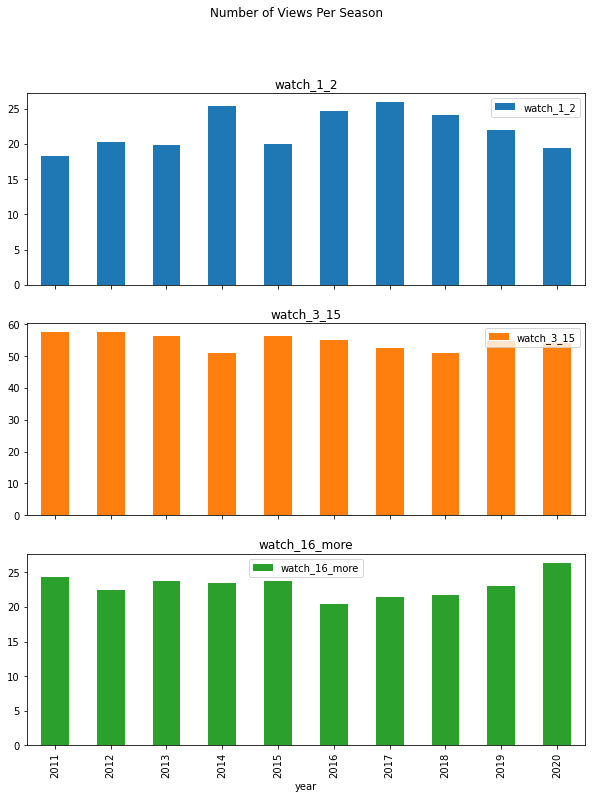

In [424]:
# distribution of viewership
n_views = viewers_demo[["year", "watch_1_2", "watch_3_15", "watch_16_more"]].set_index("year")
n_views.plot(kind="bar", subplots=True, figsize=(10, 12), title="Number of Views Per Season")

array([<AxesSubplot:title={'center':'male'}, xlabel='year'>,
       <AxesSubplot:title={'center':'female'}, xlabel='year'>],
      dtype=object)

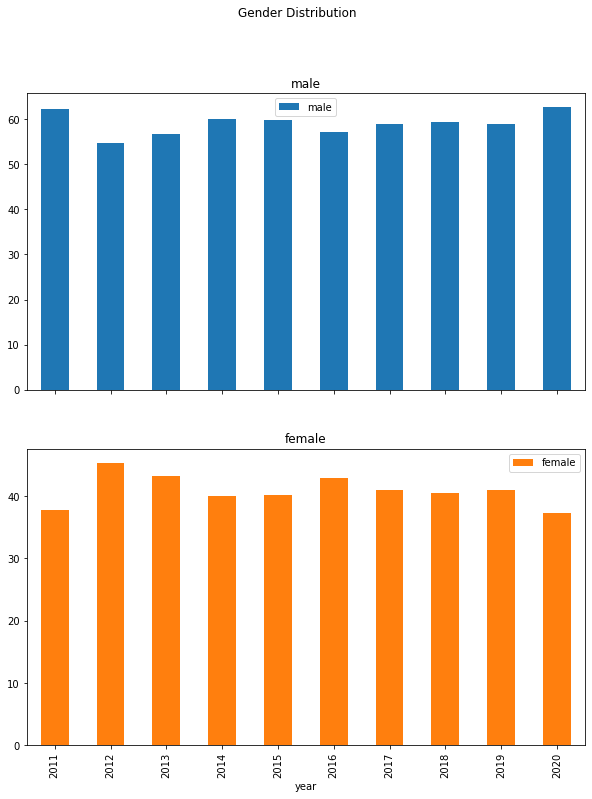

In [425]:
# distribution of gender
gender = viewers_demo[["year", "male", "female"]].set_index("year")
gender.plot(kind="bar", subplots=True, figsize=(10, 12), title="Gender Distribution")

array([<AxesSubplot:title={'center':'age_13_17'}, xlabel='year'>,
       <AxesSubplot:title={'center':'age_18_34'}, xlabel='year'>,
       <AxesSubplot:title={'center':'age_35_49'}, xlabel='year'>,
       <AxesSubplot:title={'center':'age_50_64'}, xlabel='year'>,
       <AxesSubplot:title={'center':'age_65_over'}, xlabel='year'>],
      dtype=object)

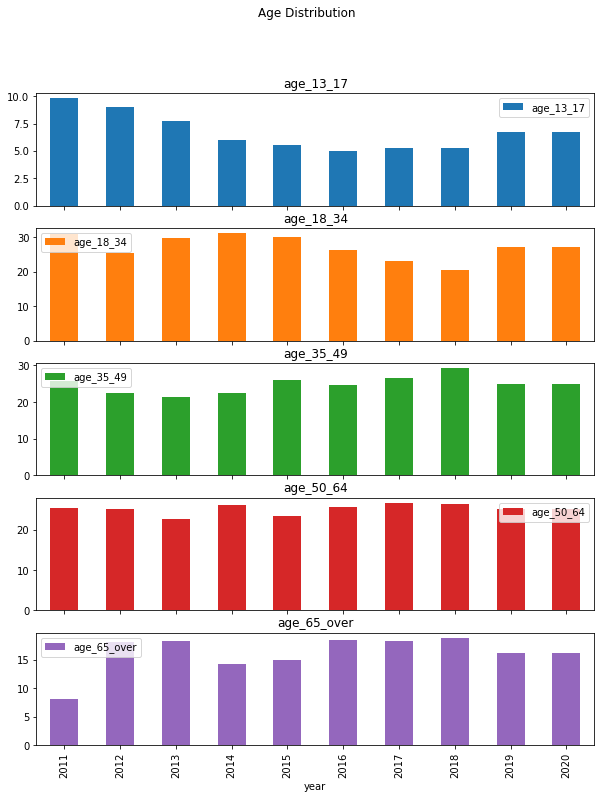

In [426]:
# Age distribution
age = viewers_demo[["year", "age_13_17", "age_18_34", "age_35_49", "age_50_64", "age_65_over"]].set_index("year")
age.plot(kind="bar", subplots=True, figsize=(10, 12), title="Age Distribution")

array([<AxesSubplot:title={'center':'median_income'}, xlabel='year'>,
       <AxesSubplot:title={'center':'income_50k_99K'}, xlabel='year'>,
       <AxesSubplot:title={'center':'income_100k_more'}, xlabel='year'>],
      dtype=object)

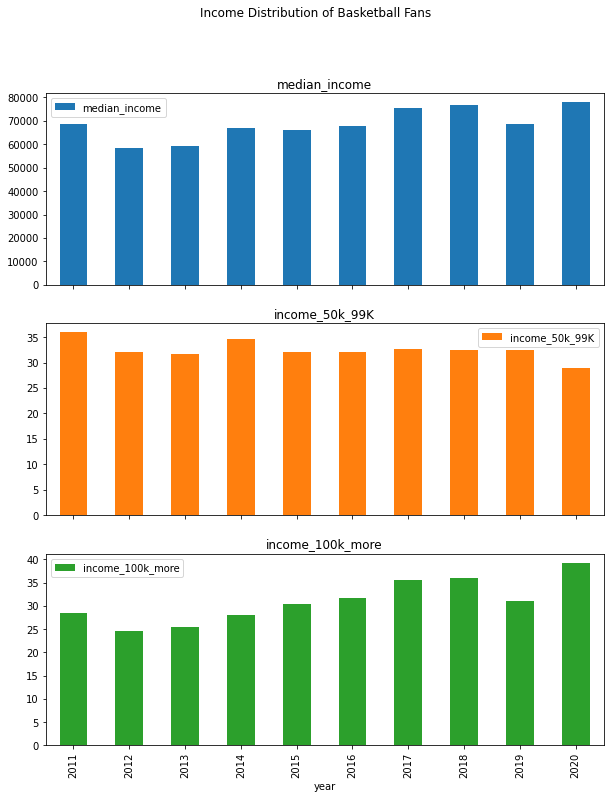

In [427]:
# income distribution
income = viewers_demo[["year", "median_income", "income_50k_99K","income_100k_more"]].set_index("year")
income.plot(kind="bar", subplots=True, title="Income Distribution of Basketball Fans", 
           figsize=(10, 12))

## sports_views_dataset

In [428]:
sports_views.head(2)

,total mobile owners who viewed nba game (s) on tv,number used for game-viewing-related activities related to game viewing on tv,% using for activities related to game (s) viewing on tv,total nba fans who watched on tv and own a smartphone and/or tablet,use smartphone and/or tablet for game-viewing-related purpose while viewing games on tv,used social media (net),used facebook to follow/post about this game,used instagram to follow/post about this game,used twitter to follow/post about this game,used google+ to follow/post about this game,...,visit league website,read sports articles/blogs about this game,watch other sports live,buy sports logo apparel,listen to radio broadcast of game,watch other sports on demand,follow fantasy teams,buy sports footwear,buy tickets to other games,other
year,,,,,,,,,,,,,,,,,,,,,
2016,71100000.0,12690000.0,17.8,71100000.0,12690000.0,9225000.0,5203000.0,2699000.0,3166000.0,1443000.0,...,3360000.0,4227000.0,2829000.0,2450000.0,2685000.0,1698000.0,1867000.0,2289000.0,1234000.0,224000.0
2017,66054000.0,15560000.0,23.6,66054000.0,15560000.0,9693000.0,5258000.0,2711000.0,3322000.0,1842000.0,...,4144000.0,3957000.0,3125000.0,2077000.0,2689000.0,2208000.0,2535000.0,2001000.0,1712000.0,41000.0


<AxesSubplot:xlabel='year'>

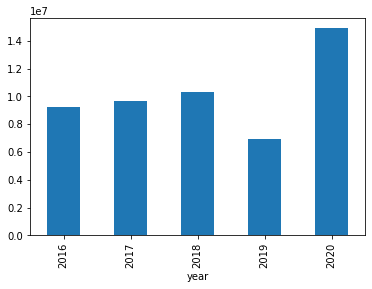

In [429]:
# distribution  of NBA fans who uses social media
sports_views["used social media (net)"].plot(kind="bar")

array([<AxesSubplot:title={'center':'used facebook to follow/post about this game'}, xlabel='year'>,
       <AxesSubplot:title={'center':'used instagram to follow/post about this game'}, xlabel='year'>,
       <AxesSubplot:title={'center':'used twitter to follow/post about this game'}, xlabel='year'>],
      dtype=object)

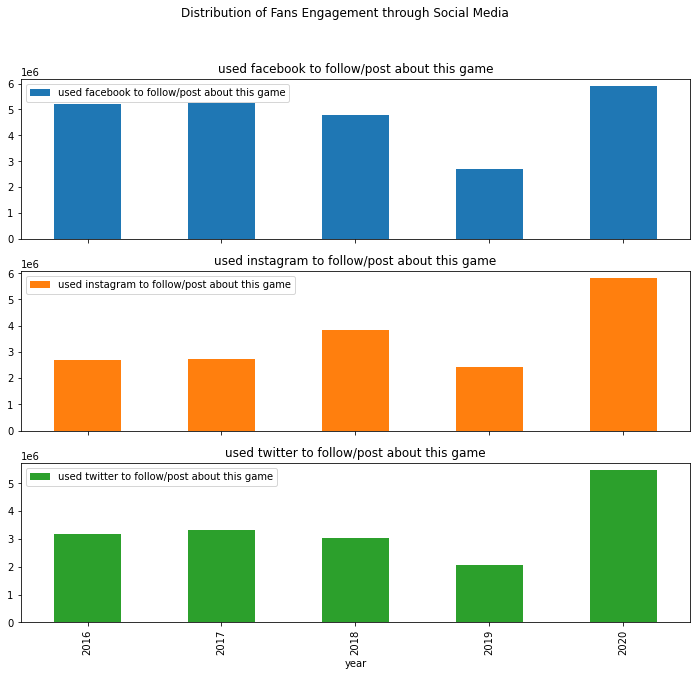

In [430]:
# Compare engagement distribution for facebook, instagram and twitter
sm = sports_views[["used facebook to follow/post about this game", 
                   "used instagram to follow/post about this game", 
                  "used twitter to follow/post about this game"]]
sm.plot(kind="bar", subplots=True, figsize=(12, 10), 
        title="Distribution of Fans Engagement through Social Media")

In [431]:
sm["total_users"] = sports_views["used social media (net)"]

<ipython-input-431-fc0e7fe562be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm["total_users"] = sports_views["used social media (net)"]


In [432]:
# facebook instagram and twitter statistics
sm.describe()

,used facebook to follow/post about this game,used instagram to follow/post about this game,used twitter to follow/post about this game,total_users
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,4.773800e+06,3.497400e+06,3.406600e+06,1.021900e+07
std,1.215792e+06,1.401114e+06,1.256145e+06,2.901026e+06
min,2.714000e+06,2.428000e+06,2.046000e+06,6.965000e+06
25%,4.802000e+06,2.699000e+06,3.030000e+06,9.225000e+06
50%,5.203000e+06,2.711000e+06,3.166000e+06,9.693000e+06
75%,5.258000e+06,3.842000e+06,3.322000e+06,1.032400e+07
max,5.892000e+06,5.807000e+06,5.469000e+06,1.488800e+07


### Explore twitter user dataset

In [433]:
twitter_users.head(3)

,"% of all NBA fans who follow players, coaches, teams or leagues on Twitter","% of all NBA fans who follow writers, broadcasters or bloggers on Twitter",Daily (add 000),4-6 days/week (add 000),1-3 days/week (add 000),Less than 1 day/week (add 000),13-17,18-34,35-49,50-64,...,Male,Female,"Under $25,000","$25,000-$49,999","$50,000-$99,999","$100,000 or more",Median Income,Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000),Logo Apparel Expenditures by College Basketball Followers on Twitter as % of Logo Apparel Expenditures by All College Basketball Fans,total_surveyed
year,,,,,,,,,,,,,,,,,,,,,
2011,8.6,9.3,2820.0,543.0,1738.0,2832.0,15.2,57.1,17.9,8.4,...,67.8,32.2,14.3,16.4,43.0,26.4,65322.222222,304401.0,29.3,17051000.0
2012,10.8,9.4,3628.0,1289.0,1721.0,4009.0,20.7,50.2,17.3,8.1,...,62.1,37.9,26.1,29.4,32.6,12.0,43900.000000,243808.0,25.4,20495000.0
2013,12.3,12.2,3218.0,1307.0,2262.0,3490.0,8.4,51.6,25.1,11.5,...,56.5,43.5,31.4,25.0,23.3,20.3,41900.000000,300413.0,33.3,20039000.0


Let's use "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter" (calling expenditures moving forward) as the unit for measurement for how likely fans are to spend money based on the influence of athletes. 
We will use a correlation matrix between expenditures and the other attribute. Select attributes whose correlation is greater than or equal to abs(0.7)

In [434]:
m_corr = twitter_users.corr()
m_corr["Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]

% of all NBA fans who follow players, coaches, teams or leagues on Twitter                                                               0.939341
% of all NBA fans who follow writers, broadcasters or bloggers on Twitter                                                                0.936068
Daily (add 000)                                                                                                                          0.592946
4-6 days/week (add 000)                                                                                                                  0.932705
1-3 days/week (add 000)                                                                                                                  0.866629
Less than 1 day/week (add 000)                                                                                                           0.856345
13-17                                                                                                                       

### attributes that made the correlation corr > abs(0.7)
% of all NBA fans who follow players, coaches, teams or leagues on Twitter: 0.939341
% of all NBA fans who follow writers, broadcasters or bloggers on Twitter: 0.936068
4-6 days/week (add 000): .932705          
1-3 days/week (add 000): 0.866629
Less than 1 day/week (add 000): 0.856345
13-17: -0.722190                                                                           
35-49: 0.845022  
Median Age: 0.800674 
Male: 0.702649 
Female: -0.702649
Under $25,000: -0.710825  
$100,000 or more: 0.909068
Median Income : 0.889481

In [435]:
# Heatmap of the selected attributes
select_twitter_users = twitter_users[["% of all NBA fans who follow players, coaches, teams or leagues on Twitter",
                                     "% of all NBA fans who follow writers, broadcasters or bloggers on Twitter",
                                     "4-6 days/week (add 000)", "1-3 days/week (add 000)", "Less than 1 day/week (add 000)",
                                     "13-17", "35-49", "Median Age", "Male", "Female", "Under $25,000", "$100,000 or more",
                                     "Median Income", "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]]
# Rename columns
attributes = ["P_follow_players", "P_follow_writers", "use_app_4_6_000", "use_app_1_3_000", "use_app_less_1_000",
              "age_13_17", "age_35_49", "median_age", "male", "female", "income_under25k",
             "income_100k_more", "median_income", "expenditures"]
columns = list(select_twitter_users.columns)
name_dict= {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6], columns[7]:attributes[7], columns[8]:attributes[8], 
          columns[9]:attributes[9], columns[10]:attributes[10], columns[11]:attributes[12],
          columns[13]:attributes[13]}
select_twitter_users.rename(columns=name_dict, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

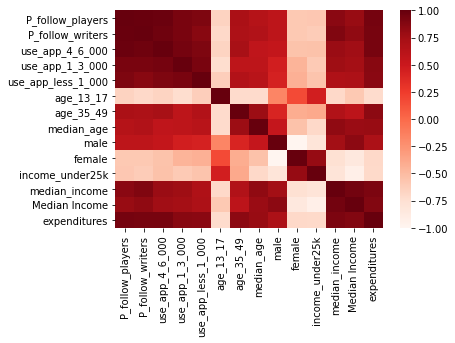

In [436]:
sns.heatmap(select_twitter_users.corr(), cmap="Reds")

In [437]:
# look at the statistics of the selected attributes
select_twitter_users.describe()

,P_follow_players,P_follow_writers,use_app_4_6_000,use_app_1_3_000,use_app_less_1_000,age_13_17,age_35_49,median_age,male,female,income_under25k,median_income,Median Income,expenditures
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,17.740000,17.25000,2340.600000,3308.100000,5709.000000,9.420000,26.310000,32.111111,64.670000,35.330000,16.840000,27.76000,65322.222222,469911.000000
std,7.150478,6.88884,1271.361055,1344.240178,2038.439817,4.879617,7.094356,3.142697,5.036103,5.036103,7.117927,8.76105,14496.036070,174914.271947
min,8.600000,9.30000,543.000000,1721.000000,2832.000000,5.400000,17.300000,26.000000,56.500000,27.500000,8.800000,12.00000,41900.000000,243808.000000
25%,12.925000,12.87500,1499.750000,2369.000000,4137.250000,6.550000,22.625000,30.500000,62.425000,32.600000,12.525000,23.85000,60700.000000,327481.750000
50%,16.500000,16.90000,2125.000000,3205.000000,5598.500000,7.550000,25.650000,32.555556,65.700000,34.300000,15.250000,28.10000,66261.111111,448420.000000
75%,20.775000,19.27500,2749.750000,3686.000000,7311.500000,9.450000,29.275000,33.750000,67.400000,37.575000,18.725000,30.65000,72375.000000,586231.000000
max,33.000000,32.70000,4918.000000,5611.000000,8711.000000,20.700000,40.800000,37.000000,72.500000,43.500000,31.400000,45.20000,90500.000000,782324.000000


The columns that ends with (000) indicate that the variable is in thousands. For instance, the mean value of people that uses twitter four to six times a day per week is 2340600.

Let's look at the attributes that were not selected using correlation. They do not have a strong linear relationship with expenditures but there could be another relationship there

In [438]:
attributes = ["Daily", "18_34", "50_64", "over_65", "income_25_50k", "income_50_99k",
              "expenditures"]
weak_correlation = twitter_users[["Daily (add 000)", "18-34", "50-64", "65+", "$25,000-$49,999",
                                "$50,000-$99,999", "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]]
columns = list(weak_correlation.columns)
name_dict = {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6]}
weak_correlation.rename(columns = name_dict, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

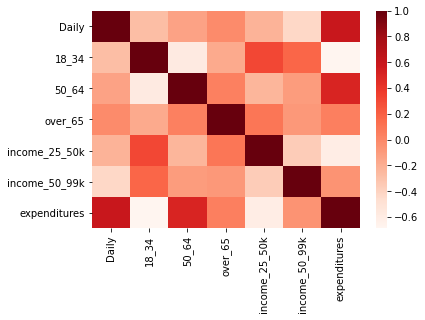

In [439]:
sns.heatmap(weak_correlation.corr(), cmap="Reds")

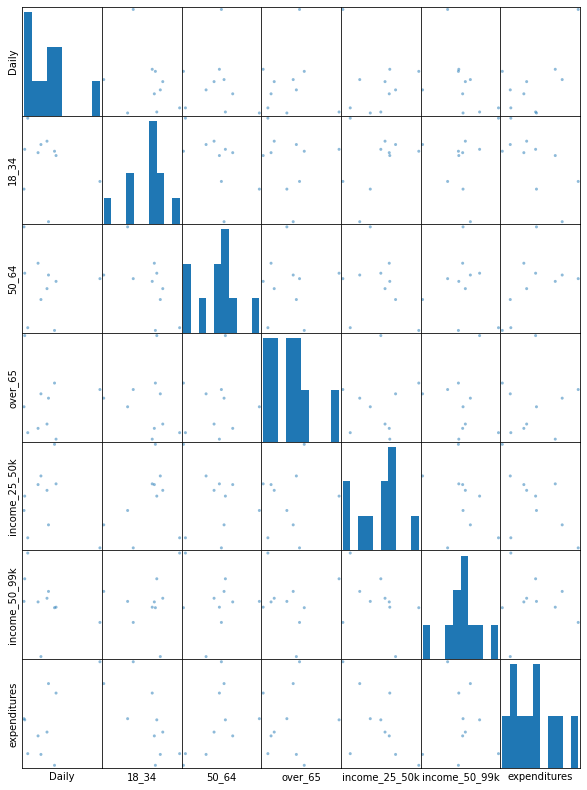

In [440]:
# scatterplot of attributes with weak correlation: corr < abs(.7)
sm = pd.plotting.scatter_matrix(weak_correlation, figsize=(10, 14))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

In [441]:
weak_correlation.describe()

,Daily,18_34,50_64,over_65,income_25_50k,income_50_99k,expenditures
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3375.200000,48.270000,13.160000,2.870000,21.710000,33.710000,469911.000000
std,670.738035,6.109928,3.334067,1.425989,4.331397,5.119993,174914.271947
min,2707.000000,35.500000,8.100000,1.200000,15.000000,23.300000,243808.000000
25%,2897.750000,45.250000,11.800000,1.750000,18.700000,32.625000,327481.750000
50%,3309.500000,50.050000,13.650000,2.900000,22.600000,33.750000,448420.000000
75%,3582.500000,51.350000,14.350000,3.450000,23.875000,35.375000,586231.000000
max,4998.000000,57.100000,19.500000,6.000000,29.400000,43.000000,782324.000000


### Explore Facebook users dataset

In [442]:
facebook_users.head(3)

,"% of all NBA fans who follow players, coaches, teams or leagues on Facebook","% of all NBA fans who follow writers, broadcasters or bloggers on Facebook",Daily (add 000),4-6 days/week (add 000),1-3 days/week (add 000),Less than 1 day/week (add 000),13-17,18-34,35-49,50-64,...,"$25,000-$49,999","$50,000-$99,999","$100,000 or more",Median Income,Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000),Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans,Average Expenditure Per Buyer,Number of followers - add 000,% of all NBA Fans,total_surveyed
year,,,,,,,,,,,,,,,,,,,,,
2011,17.5,17.1,3015.0,2353.0,3241.0,8442.0,16.3,42.8,21.0,16.2,...,24.3,38.1,25.0,61755.555556,571272.0,55.0,80.3,7933.0,10.2,17051000.0
2012,19.1,17.4,3897.0,2282.0,4042.0,10274.0,14.1,47.4,23.2,13.3,...,32.3,27.6,13.3,42600.000000,506120.0,52.7,93.2,10647.0,12.4,20495000.0
2013,22.6,21.9,4101.0,2199.0,4514.0,9225.0,8.4,51.6,25.1,11.5,...,23.9,29.0,20.1,48700.000000,485582.0,53.8,68.6,10278.0,13.9,20039000.0


In [443]:
# correlation matrix
facebook_corr = facebook_users.corr()
facebook_corr[["Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)",
              "Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans",
              "Average Expenditure Per Buyer"]]

,Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000),Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans,Average Expenditure Per Buyer
"% of all NBA fans who follow players, coaches, teams or leagues on Facebook",0.889413,0.920609,-0.362352
"% of all NBA fans who follow writers, broadcasters or bloggers on Facebook",0.895530,0.934203,-0.389608
Daily (add 000),0.542073,0.641969,-0.496178
4-6 days/week (add 000),0.789341,0.849070,-0.410504
1-3 days/week (add 000),0.839567,0.909194,-0.556938
Less than 1 day/week (add 000),0.257231,0.284360,-0.427189
13-17,-0.734494,-0.755420,0.331806
18-34,-0.679305,-0.520873,-0.020162
35-49,0.769901,0.655290,-0.174568
50-64,0.759625,0.725401,-0.137045


In [444]:
# same selection criteria as the twitter dataset
select_facebook = facebook_users[["% of all NBA fans who follow players, coaches, teams or leagues on Facebook",
                                 "% of all NBA fans who follow writers, broadcasters or bloggers on Facebook",
                                 "4-6 days/week (add 000)", "1-3 days/week (add 000)", "13-17",
                                 "35-49", "50-64", "65+", "Median Age", "Median Income",
                                 ]]
# Rename columns
attributes = ["P_follow_players","P_follow_writers", "use_app_4_6_000", "use_app_1_3_000", "age_13_17", "age_35_49",
             "age_50_64", "age_65+", "median_age", "median_income"]
columns = list(select_facebook.columns)
name_dict = {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6], columns[7]:attributes[7], columns[8]:attributes[8], 
          columns[9]:attributes[9]}
select_facebook.rename(columns=name_dict, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

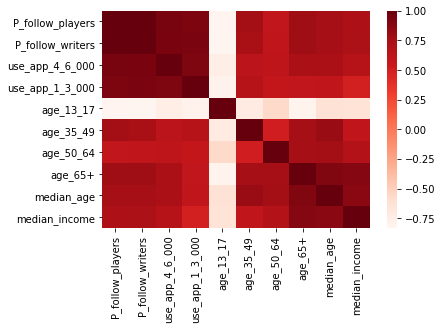

In [445]:
sns.heatmap(select_facebook.corr(), cmap="Reds")

In [446]:
select_facebook.describe()

,P_follow_players,P_follow_writers,use_app_4_6_000,use_app_1_3_000,age_13_17,age_35_49,age_50_64,age_65+,median_age,median_income
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,29.430000,27.790000,3265.300000,5841.50000,7.140000,27.50000,16.600000,5.140000,34.333333,61755.555556
std,9.243622,8.393046,1007.930559,1827.32514,4.747912,5.18395,2.472965,1.886325,2.867442,10866.575778
min,17.500000,17.100000,2199.000000,3241.00000,2.300000,21.00000,11.500000,2.000000,30.000000,42600.000000
25%,22.800000,22.225000,2319.250000,4590.50000,3.950000,23.47500,16.225000,3.750000,31.750000,57125.000000
50%,29.200000,27.700000,3290.500000,5776.00000,5.600000,27.45000,17.250000,5.200000,34.666667,61677.777778
75%,34.550000,31.975000,3687.750000,6499.25000,8.350000,31.17500,18.000000,6.725000,36.000000,67975.000000
max,47.500000,44.200000,5068.000000,8947.00000,16.300000,36.60000,19.300000,7.500000,38.000000,78700.000000


In [447]:
# look at variables with weak correlation
fb_weak_corr = facebook_users[["Daily (add 000)", "Less than 1 day/week (add 000)", "18-34",
                              "Male", "Female", "Under $25,000", "$25,000-$49,999", 
                              "$50,000-$99,999", "$100,000 or more", 
                               "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)"]]
columns = fb_weak_corr.columns
attributes = ["daily", "use_app_less_1", "age_18_34", "male", "female", "income_under_25k",
             "income_25_50k", "income_50_100k", "income_100_more", "expenditures"]
name_dict = {columns[0]: attributes[0],columns[1]: attributes[1],columns[2]: attributes[2],
            columns[3]: attributes[3], columns[4]: attributes[4], columns[5]: attributes[5],
            columns[6]: attributes[6], columns[7]: attributes[7], columns[8]: attributes[8],
            columns[9]: attributes[9]}
fb_weak_corr.rename(columns=name_dict, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


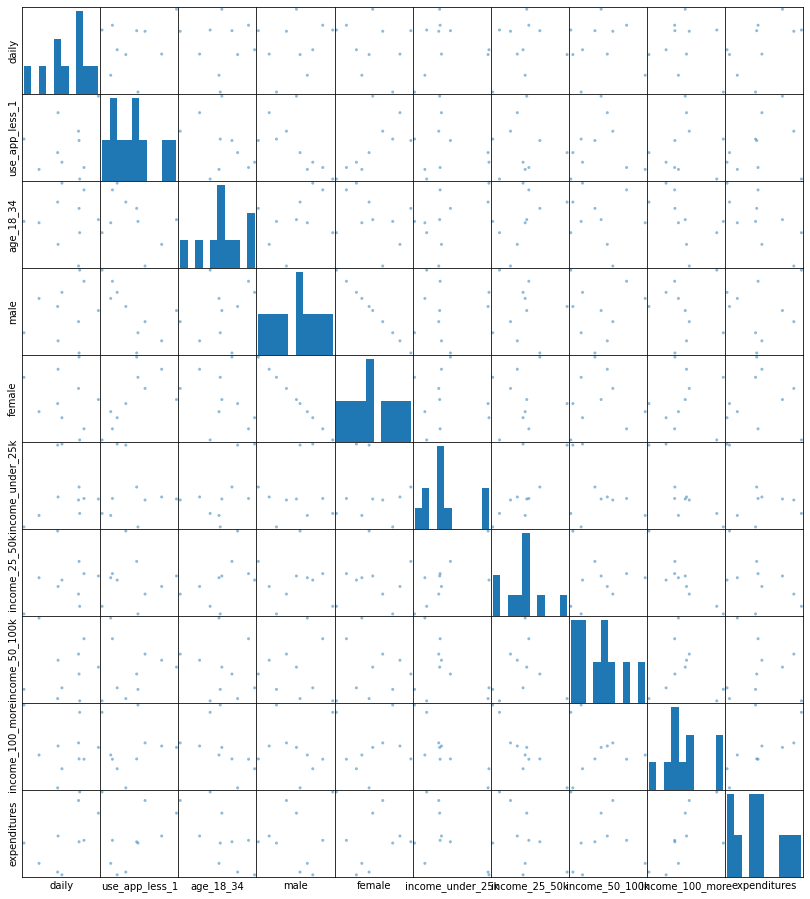

In [448]:
# scatterplot of attributes with weak correlation: corr < abs(.7)
sm = pd.plotting.scatter_matrix(fb_weak_corr, figsize=(14, 16))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

In [449]:
fb_weak_corr.describe()

,daily,use_app_less_1,age_18_34,male,female,income_under_25k,income_25_50k,income_50_100k,income_100_more,expenditures
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,4294.700000,11097.800000,43.630000,59.480000,40.520000,17.270000,23.900000,31.470000,27.370000,7.631242e+05
std,1063.736606,2880.982232,5.536355,2.623314,2.623314,5.559187,3.993328,3.503982,8.773958,2.137120e+05
min,2300.000000,7394.000000,33.200000,55.300000,36.500000,10.400000,18.100000,27.300000,13.300000,4.855820e+05
25%,3902.000000,8792.250000,41.150000,57.575000,38.850000,13.775000,21.825000,28.850000,23.525000,6.092308e+05
50%,4494.500000,10932.500000,43.300000,59.700000,40.300000,16.050000,24.100000,31.250000,26.350000,7.380500e+05
75%,4934.750000,12393.750000,47.050000,61.150000,42.425000,17.900000,24.900000,33.200000,29.025000,9.040780e+05
max,5828.000000,16423.000000,51.600000,63.500000,44.700000,27.000000,32.300000,38.100000,42.800000,1.104961e+06


#### expenditures comparison for facebook users and twitter users

<AxesSubplot:title={'center':'Expenditures: Facebook vs Twitter'}>

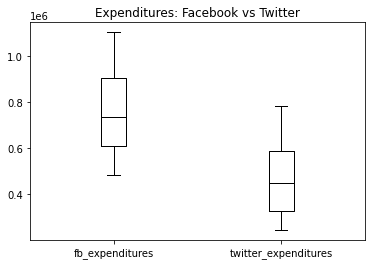

In [450]:
# create a new dataframe with facebook and twitter expenditures
d = {"fb_expenditures":fb_weak_corr["expenditures"], 
     "twitter_expenditures":weak_correlation["expenditures"]}
expenditures = pd.DataFrame(data=d)
expenditures.plot(kind='box', title="Expenditures: Facebook vs Twitter", color="k")

## Explore datasets from sport apparel 

In [451]:
a_age_group.head(2)

,Unnamed: 0,13-17,18-34,35-49,50-64,65+,Median Age,Base (no. of buyers - add 000)
0,2011,12.5,40.3,28.3,16.9,1.9,34.666667,14856.0
1,2012,13.8,35.9,24.6,19.6,6.1,35.000000,14139.0


In [452]:
# set the index
a_age_group.rename({"Unnamed: 0": "year"}, axis = 1, inplace=True)
a_age_group.set_index("year", inplace=True)

In [453]:
a_age_group

,13-17,18-34,35-49,50-64,65+,Median Age,Base (no. of buyers - add 000)
year,,,,,,,
2011,12.5,40.3,28.3,16.9,1.9,34.666667,14856.0
2012,13.8,35.9,24.6,19.6,6.1,35.000000,14139.0
2013,10.0,40.7,30.3,12.7,6.3,34.000000,13399.0
2014,8.7,45.4,25.5,15.6,4.8,33.000000,14530.0
2015,7.7,42.8,28.3,15.0,6.3,34.000000,20053.0
2016,5.5,44.5,26.4,18.8,4.8,34.000000,16509.0
2016,9.5,38.0,32.1,15.9,4.4,36.000000,15782.0
2018,6.2,35.2,37.2,15.6,5.7,37.000000,20026.0
2019,4.8,45.3,28.9,12.9,8.1,34.000000,13481.0


In [454]:
a_age_group.describe()

,13-17,18-34,35-49,50-64,65+,Median Age,Base (no. of buyers - add 000)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,8.480000,40.900000,29.310000,15.900000,5.390000,34.666667,16144.100000
std,3.013967,3.689023,3.699685,2.194437,1.614827,1.154701,2579.524437
min,4.800000,35.200000,24.600000,12.700000,1.900000,33.000000,13399.000000
25%,6.125000,38.575000,26.875000,15.150000,4.800000,34.000000,14236.750000
50%,8.200000,40.800000,28.600000,15.750000,5.600000,34.333333,15319.000000
75%,9.875000,44.075000,31.200000,16.675000,6.250000,35.000000,18126.750000
max,13.800000,45.400000,37.200000,19.600000,8.100000,37.000000,20053.000000


### Amount spent

In [455]:
a_amount_spent.head()

,Unnamed: 0,Under $50,$50 or more,Base (no. of buyers - add 000)
0,2011,47.8,52.2,14856.0
1,2012,52.6,47.4,14139.0
2,2013,53.6,46.4,13399.0
3,2014,41.8,58.2,14530.0
4,2015,50.3,49.7,20053.0


In [456]:
a_amount_spent.rename({"Unnamed: 0": "year"}, axis = 1, inplace=True)
a_amount_spent.set_index("year", inplace=True)

In [457]:
a_amount_spent.describe()

,Under $50,$50 or more,Base (no. of buyers - add 000)
count,10.000000,10.000000,10.000000
mean,47.590000,52.410000,16144.100000
std,4.935461,4.935461,2579.524437
min,40.400000,46.000000,13399.000000
25%,43.925000,47.975000,14236.750000
50%,47.450000,52.550000,15319.000000
75%,52.025000,56.075000,18126.750000
max,54.000000,59.600000,20053.000000


From the TV Viewing Profiles dataset, we had a strong positive correlation between expenditure and age_35_49. Surpringly, we had the opposite relation between expenditure and age_18_34. 

<AxesSubplot:>

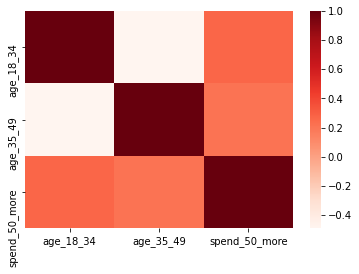

In [458]:
d = {"age_18_34":a_age_group["18-34"], "age_35_49":a_age_group["35-49"],
    "spend_50_more":a_amount_spent["$50 or more"]}
spending = pd.DataFrame(data=d)
sns.heatmap(spending.corr(), cmap="Reds")

In [459]:
spending.corr()

,age_18_34,age_35_49,spend_50_more
age_18_34,1.000000,-0.492128,0.270836
age_35_49,-0.492128,1.000000,0.212789
spend_50_more,0.270836,0.212789,1.000000


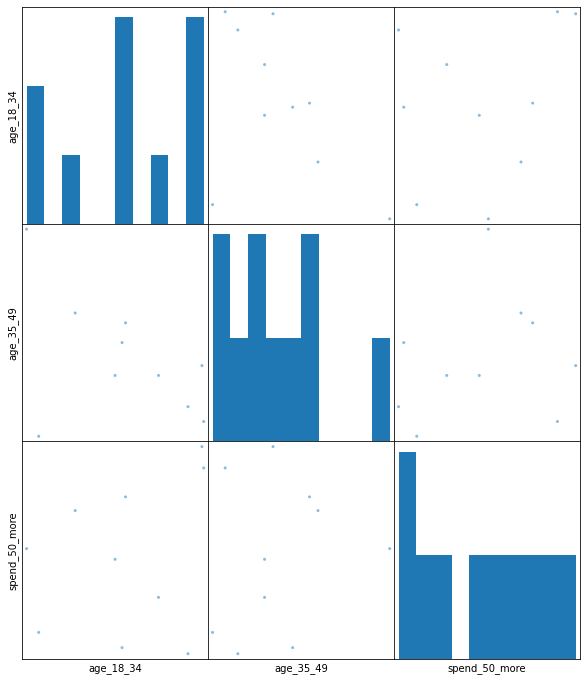

In [460]:
sm = pd.plotting.scatter_matrix(spending, figsize=(10, 12))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

### Explore average expenditures

In [461]:
a_average_expenditure.head(3)

,Categories,2011,2012,2013,2014,2015,2016,2016.1,2018,2019,2020
0,Total Buyers (add 000),14856.0,14139.0,13399.0,14530.0,20053.0,16509.0,15782.0,20026.0,13481.0,18666.0
1,Buyers as % of Total Fans,19.1,16.5,18.1,19.1,23.9,20.3,21.1,26.9,19.2,27.4
2,Total Expenditures (add 000),1038904.0,960616.0,902121.0,1126583.0,1272370.0,1125701.0,1148535.0,1480613.0,1189284.0,1392110.0


In [462]:
a_average_expenditure.set_index("Categories", inplace=True)
a_average_expenditure = a_average_expenditure.T

In [463]:
a_average_expenditure.describe()

Categories,Total Buyers (add 000),Buyers as % of Total Fans,Total Expenditures (add 000),Average Expenditure for All Sports Logo Apparel Buyers,Average Expenditure for Sports Logo Apparel Buyers Who Viewed at Least One Game on Online Computer,Average Expenditure for Sports Logo Apparel Spent by Those Who Viewed at Least One Game on Mobile*,Average Expenditure for Sports Logo Apparel Spent by Those Who Viewed at Least One Game on Tablet,Average Expenditure for Sports Logo Apparel Spent by Those Who Viewed at Least One Game on Smartphone,Average Expenditure for Sports Logo Apparel Buyers Who Follow on Facebook,Average Expenditure for Sports Logo Apparel Buyers Who Follow on Twitter,Average Expenditure for Sports Logo Apparel Spent by Those Who Attended 4+ times/yr.,Average Expenditure for Sports Logo Apparel Spent by Those Who Live In Western Region,Average Expenditure for Sports Logo Apparel Spent by Those Who Are Ages 50+,Average Expenditure for Sports Logo Apparel Spent by Those With $100K+ HH Income,All Fans,Follow NBA on Facebook,Follow NBA on Twitter,Viewed at least one game on digital device (Computer/Tablet/Smartphone),Attended at Least One NBA Game
count,10.000000,10.000000,1.000000e+01,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,16144.100000,21.160000,1.163684e+06,72.37000,81.100000,85.233333,86.040000,79.860000,77.060000,78.640000,121.333333,76.610000,68.58000,75.350000,21.160000,40.050000,39.96000,42.600000,47.844444
std,2579.524437,3.705012,1.805427e+05,6.94455,12.849384,10.097524,16.592247,16.855345,8.459341,9.915218,18.525958,8.937368,9.35887,8.793337,3.705012,5.772396,5.32879,10.165082,5.023083
min,13399.000000,16.500000,9.021210e+05,63.40000,64.500000,68.700000,63.900000,41.600000,62.400000,64.400000,90.000000,59.400000,56.10000,62.100000,16.500000,30.900000,34.30000,24.400000,40.600000
25%,14236.750000,19.100000,1.060603e+06,67.97500,71.600000,78.758333,74.000000,72.250000,70.425000,69.950000,108.775000,71.450000,64.95000,72.250000,19.100000,35.800000,35.12500,38.825000,44.525000
50%,15319.000000,19.750000,1.137559e+06,71.35000,78.400000,86.500000,83.850000,86.050000,78.850000,79.700000,119.516667,76.800000,66.95000,75.700000,19.750000,40.400000,40.05000,44.650000,47.572222
75%,18126.750000,23.200000,1.251598e+06,74.42500,93.350000,90.900000,93.850000,89.125000,81.875000,84.175000,137.000000,82.675000,67.70000,80.950000,23.200000,42.225000,42.65000,46.425000,50.150000
max,20053.000000,27.400000,1.480613e+06,88.20000,99.600000,102.700000,122.500000,100.600000,89.000000,94.300000,149.800000,89.000000,86.20000,90.600000,27.400000,50.400000,50.60000,61.400000,56.800000


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:title={'center':'Distribution of Expenditures'}>

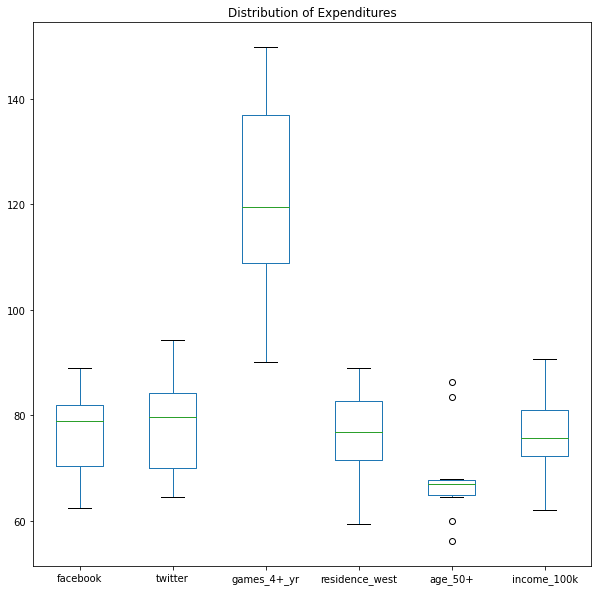

In [467]:
columns = a_average_expenditure.columns
avg_exp =  a_average_expenditure[[columns[8], columns[9], columns[10],
                                  columns[11], columns[12],columns[13]]]
columns = avg_exp.columns
new_names = ["facebook", "twitter", "games_4+_yr", "residence_west", "age_50+",
             "income_100k"]
name_dict = {columns[0]:new_names[0], columns[1]:new_names[1], columns[2]:new_names[2],
            columns[3]:new_names[3], columns[4]:new_names[4], columns[5]:new_names[5]}
avg_exp.rename(columns=name_dict, inplace=True)
avg_exp.plot(kind = "box", title = "Distribution of Expenditures", figsize=(10, 10))

### explore gender dataset

In [468]:
a_gender.head(2)

,Unnamed: 0,Male,Female,Base (no. of buyers - add 000)
0,2011,62.8,37.2,14856.0
1,2012,53.0,47.0,14139.0


In [469]:
a_gender.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_gender.set_index("year", inplace=True)
a_gender.head(2)

,Male,Female,Base (no. of buyers - add 000)
year,,,
2011,62.8,37.2,14856.0
2012,53.0,47.0,14139.0


In [470]:
a_gender.describe()

,Male,Female,Base (no. of buyers - add 000)
count,10.000000,10.000000,10.000000
mean,60.330000,39.670000,16144.100000
std,4.005843,4.005843,2579.524437
min,53.000000,33.800000,13399.000000
25%,58.275000,37.350000,14236.750000
50%,60.250000,39.750000,15319.000000
75%,62.650000,41.725000,18126.750000
max,66.200000,47.000000,20053.000000


### Explore geographic region dataset

In [471]:
a_geographic_region.head(2)

,Unnamed: 0,Northeast,Midwest,South,West,Base (no. of buyers - add 000)
0,2011,14.3,17.0,41.2,27.5,14856.0
1,2012,19.5,23.5,37.4,19.5,14139.0


In [472]:
a_geographic_region.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_geographic_region.set_index("year", inplace=True)
a_geographic_region.head()

,Northeast,Midwest,South,West,Base (no. of buyers - add 000)
year,,,,,
2011,14.3,17.0,41.2,27.5,14856.0
2012,19.5,23.5,37.4,19.5,14139.0
2013,16.0,20.4,43.4,20.3,13399.0
2014,16.3,21.4,41.4,20.8,14530.0
2015,15.1,22.0,37.5,25.4,20053.0


In [473]:
a_geographic_region.describe()

,Northeast,Midwest,South,West,Base (no. of buyers - add 000)
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,16.110000,20.480000,38.190000,25.220000,16144.100000
std,2.289323,2.368215,3.124971,4.378178,2579.524437
min,11.600000,16.700000,33.600000,19.500000,13399.000000
25%,15.325000,19.550000,37.150000,20.950000,14236.750000
50%,16.200000,20.450000,37.450000,26.100000,15319.000000
75%,16.400000,21.850000,40.625000,29.225000,18126.750000
max,19.500000,23.700000,43.400000,30.600000,20053.000000


### Explore household income

In [474]:
a_household_income.head(2)

,Unnamed: 0,"Under $25,000","$25,000-$49,999","$50,000-$99,999","$100,000 or more",Median Income,Base (no. of buyers - add 000)
0,2011,9.0,18.7,36.2,36.1,66533.333333,14856.0
1,2012,22.8,27.5,27.8,21.9,49600.000000,14139.0


In [475]:
a_household_income.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_household_income.set_index("year", inplace=True)

In [476]:
a_household_income.describe()

,"Under $25,000","$25,000-$49,999","$50,000-$99,999","$100,000 or more",Median Income,Base (no. of buyers - add 000)
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,14.87000,23.030000,31.41000,30.690000,66533.333333,16144.100000
std,4.70273,3.164403,3.19703,6.860426,10279.321205,2579.524437
min,9.00000,18.700000,25.70000,21.900000,49600.000000,13399.000000
25%,12.22500,20.400000,30.02500,25.125000,58425.000000,14236.750000
50%,13.75000,22.900000,31.30000,30.900000,67166.666667,15319.000000
75%,17.30000,24.725000,33.47500,35.575000,73800.000000,18126.750000
max,22.80000,28.100000,36.20000,42.200000,83200.000000,20053.000000


## Sports influence dataset

### age dataset

In [477]:
i_age.head(3)

,Unnamed: 0,13-17,18-24,25-34,35-49,50+
0,2012.0,197.0,210.0,113.0,115.0,42.0
1,2013.0,176.0,106.0,138.0,99.0,66.0
2,2014.0,147.0,103.0,122.0,115.0,71.0


In [478]:
i_age.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
i_age.set_index("year", inplace=True)
i_age.head()

,13-17,18-24,25-34,35-49,50+
year,,,,,
2012.0,197.0,210.0,113.0,115.0,42.0
2013.0,176.0,106.0,138.0,99.0,66.0
2014.0,147.0,103.0,122.0,115.0,71.0
2015.0,143.0,140.0,120.0,112.0,62.0
2016.0,151.0,179.0,147.0,105.0,54.0


In [479]:
i_age.describe()

,13-17,18-24,25-34,35-49,50+
count,9.00000,9.000000,9.000000,9.000000,9.000000
mean,149.00000,164.444444,144.444444,95.322222,54.555556
std,25.09482,46.634513,26.486370,37.028157,10.429659
min,119.00000,103.000000,113.000000,1.900000,42.000000
25%,129.00000,136.000000,122.000000,99.000000,48.000000
50%,147.00000,171.000000,143.000000,109.000000,54.000000
75%,155.00000,197.000000,153.000000,115.000000,62.000000
max,197.00000,238.000000,199.000000,121.000000,71.000000


### basketball dataset

In [480]:
i_basketball_data.head(2)

,Unnamed: 0,% Saying Sport Sponsorship is Extremely Influential,% Saying Sport Sponsorship is Very Influential,% Saying Sport Sponsorship is Moderately Influential,% Saying Sport Sponsorship is Slightly Influential,% Saying Sport Sponsorship is Not at All Influential,Base (Total No. of NBA Fans - add 000),Male,Female,13-17,...,Used Smartphone to View at Least One Game/yr.,Used Tablet to View at Least One Game/yr.,Used Facebook to Follow Some Type of NBA Activity,Used Facebook Daily to Follow Some Type of NBA Activity,Used Twitter to Follow Some Type of NBA-related Activity,Used Twitter Daily to Follow Some Type of NBA-related Activity,Used Smartphone for Some Type of Sports-related Activity,Used Tablet for Some Type of Sports-related Activity,Used Mobile Device (Smartphone and/or Tablet) for Some Type of Sports-related Activity,Purchased NBA Logo Apparel
0,2012.0,5.9,8.1,19.3,17.1,49.7,85556.0,114.0,82.0,197.0,...,143.0,244.0,216.0,328.0,203.0,303.0,133.0,138.0,127.0,204.0
1,2013.0,5.4,9.4,17.7,17.2,50.3,74187.0,98.0,108.0,176.0,...,251.0,208.0,183.0,250.0,167.0,204.0,121.0,127.0,114.0,227.0


In [481]:
i_basketball_data.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
i_basketball_data.set_index("year", inplace=True)
i_basketball_data.head()

,% Saying Sport Sponsorship is Extremely Influential,% Saying Sport Sponsorship is Very Influential,% Saying Sport Sponsorship is Moderately Influential,% Saying Sport Sponsorship is Slightly Influential,% Saying Sport Sponsorship is Not at All Influential,Base (Total No. of NBA Fans - add 000),Male,Female,13-17,18-24,...,Used Smartphone to View at Least One Game/yr.,Used Tablet to View at Least One Game/yr.,Used Facebook to Follow Some Type of NBA Activity,Used Facebook Daily to Follow Some Type of NBA Activity,Used Twitter to Follow Some Type of NBA-related Activity,Used Twitter Daily to Follow Some Type of NBA-related Activity,Used Smartphone for Some Type of Sports-related Activity,Used Tablet for Some Type of Sports-related Activity,Used Mobile Device (Smartphone and/or Tablet) for Some Type of Sports-related Activity,Purchased NBA Logo Apparel
year,,,,,,,,,,,,,,,,,,,,,
2012.0,5.9,8.1,19.3,17.1,49.7,85556.0,114.0,82.0,197.0,210.0,...,143.0,244.0,216.0,328.0,203.0,303.0,133.0,138.0,127.0,204.0
2013.0,5.4,9.4,17.7,17.2,50.3,74187.0,98.0,108.0,176.0,106.0,...,251.0,208.0,183.0,250.0,167.0,204.0,121.0,127.0,114.0,227.0
2014.0,7.3,10.2,18.4,15.7,48.4,76026.0,106.0,92.0,147.0,103.0,...,312.0,260.0,183.0,291.0,160.0,214.0,129.0,144.0,123.0,209.0
2015.0,10.7,16.1,19.5,15.7,38.0,83990.0,105.0,92.0,143.0,140.0,...,169.0,190.0,165.0,231.0,173.0,224.0,120.0,124.0,117.0,201.0
2016.0,7.9,10.3,18.9,12.5,50.4,81141.0,105.0,93.0,151.0,179.0,...,246.0,252.0,186.0,325.0,211.0,253.0,119.0,131.0,113.0,228.0


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

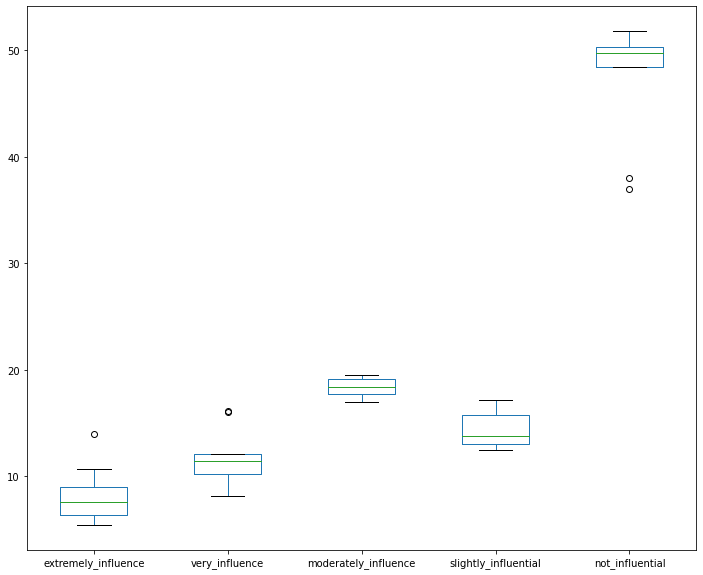

In [482]:
# sports influence opinion
columns = i_basketball_data.columns
influence_opinion = i_basketball_data[[columns[0], columns[1], columns[2], columns[3],
                                       columns[4]]]
influence_columns= influence_opinion.columns
attributes = ["extremely_influence", "very_influence", "moderately_influence", 
             "slightly_influential", "not_influential"]
name_dict = {influence_columns[0]:attributes[0], influence_columns[1]:attributes[1],
            influence_columns[2]:attributes[2], influence_columns[3]:attributes[3],
            influence_columns[4]:attributes[4]}
influence_opinion.rename(columns=name_dict, inplace=True)
influence_opinion.plot(kind="box", figsize=(12, 10))

<AxesSubplot:>

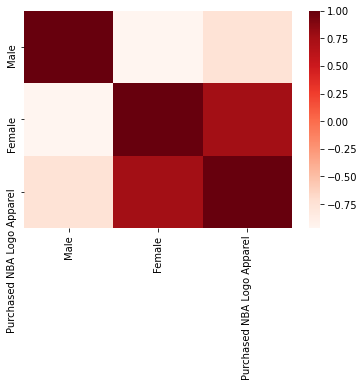

In [483]:
gender = i_basketball_data[[columns[6], columns[7], columns[42]]]
sns.heatmap(gender.corr(), cmap="Reds")

In [484]:
gender.corr()

,Male,Female,Purchased NBA Logo Apparel
Male,1.000000,-0.968037,-0.748839
Female,-0.968037,1.000000,0.756637
Purchased NBA Logo Apparel,-0.748839,0.756637,1.000000


In [485]:
age = i_basketball_data[[columns[8], columns[9], columns[10], columns[11],
                         columns[12], columns[42]]]
age.corr()

,13-17,18-24,25-34,35-49,50+,Purchased NBA Logo Apparel
13-17,1.000000,-0.051804,-0.536920,0.494772,-0.047759,0.033705
18-24,-0.051804,1.000000,0.358169,0.241960,-0.955839,0.235178
25-34,-0.536920,0.358169,1.000000,-0.212491,-0.378390,0.695833
35-49,0.494772,0.241960,-0.212491,1.000000,-0.128179,0.358441
50+,-0.047759,-0.955839,-0.378390,-0.128179,1.000000,-0.241418
Purchased NBA Logo Apparel,0.033705,0.235178,0.695833,0.358441,-0.241418,1.000000


In [486]:
region = i_basketball_data[[columns[13], columns[14], columns[15], 
                            columns[16], columns[42]]]
region.corr()

,Northeast,Midwest,South,West,Purchased NBA Logo Apparel
Northeast,1.000000,-0.114730,-0.269186,-0.140299,-0.089320
Midwest,-0.114730,1.000000,-0.148888,-0.699664,0.510753
South,-0.269186,-0.148888,1.000000,-0.366408,-0.131045
West,-0.140299,-0.699664,-0.366408,1.000000,-0.288933
Purchased NBA Logo Apparel,-0.089320,0.510753,-0.131045,-0.288933,1.000000


<AxesSubplot:>

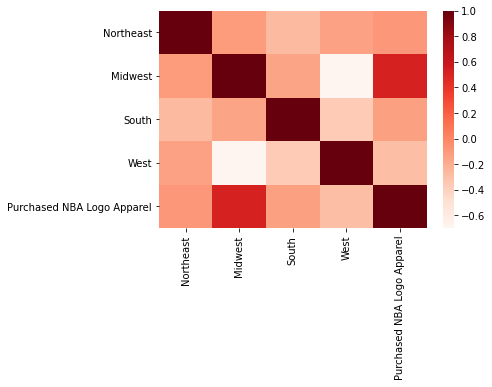

In [487]:
sns.heatmap(region.corr(), cmap="Reds")

In [488]:
income = i_basketball_data[[columns[17], columns[18], columns[19], 
                            columns[20], columns[42]]]
income.corr()

,"Under $25,000","$25,000-$49,999","$50,000-$99,999","$100,000 or more",Purchased NBA Logo Apparel
"Under $25,000",1.000000,0.164455,0.310717,-0.633117,0.666782
"$25,000-$49,999",0.164455,1.000000,0.128276,-0.734229,0.191005
"$50,000-$99,999",0.310717,0.128276,1.000000,-0.089799,0.222784
"$100,000 or more",-0.633117,-0.734229,-0.089799,1.000000,-0.243084
Purchased NBA Logo Apparel,0.666782,0.191005,0.222784,-0.243084,1.000000


In [489]:
game_attendance = i_basketball_data[[columns[21], columns[22], columns[23], 
                            columns[24], columns[42]]]
game_attendance.corr()

,Total attended at least one game/yr.,Attended 1 game/yr.,Attended 2-3 games/yr.,Attended 4+ games/yr.,Purchased NBA Logo Apparel
Total attended at least one game/yr.,1.000000,0.699003,0.772433,-0.028564,-0.153366
Attended 1 game/yr.,0.699003,1.000000,0.191761,0.494484,-0.266719
Attended 2-3 games/yr.,0.772433,0.191761,1.000000,-0.636683,0.275093
Attended 4+ games/yr.,-0.028564,0.494484,-0.636683,1.000000,-0.636389
Purchased NBA Logo Apparel,-0.153366,-0.266719,0.275093,-0.636389,1.000000


In [490]:
game_viewing = i_basketball_data[[columns[25], columns[26], columns[27], 
                            columns[28], columns[29], columns[30], columns[31],
                                  columns[42]]]
game_viewing.corr()

,Total viewed at least 1 game/yr.,Viewed 1-2 games/yr.,Viewed 3-15 games/yr.,Viewed 16+ games/yr.,Total viewed at least one game/yr.,Viewed 1-2 games/yr..1,Viewed 3+ games/yr.,Purchased NBA Logo Apparel
Total viewed at least 1 game/yr.,1.000000,-0.658944,0.267191,0.679069,-0.475064,0.048484,-0.879697,-0.348716
Viewed 1-2 games/yr.,-0.658944,1.000000,-0.613616,-0.253878,0.384801,0.154137,0.402679,-0.111972
Viewed 3-15 games/yr.,0.267191,-0.613616,1.000000,-0.449910,-0.547978,-0.418215,-0.451794,-0.137158
Viewed 16+ games/yr.,0.679069,-0.253878,-0.449910,1.000000,-0.055058,0.275515,-0.372238,-0.131254
Total viewed at least one game/yr.,-0.475064,0.384801,-0.547978,-0.055058,1.000000,0.801894,0.756005,0.504431
Viewed 1-2 games/yr..1,0.048484,0.154137,-0.418215,0.275515,0.801894,1.000000,0.241605,0.248380
Viewed 3+ games/yr.,-0.879697,0.402679,-0.451794,-0.372238,0.756005,0.241605,1.000000,0.674278
Purchased NBA Logo Apparel,-0.348716,-0.111972,-0.137158,-0.131254,0.504431,0.248380,0.674278,1.000000


In [491]:
social_media = i_basketball_data[[columns[35], columns[36], columns[37], 
                            columns[38], columns[42]]]
social_media.corr()

,Used Facebook to Follow Some Type of NBA Activity,Used Facebook Daily to Follow Some Type of NBA Activity,Used Twitter to Follow Some Type of NBA-related Activity,Used Twitter Daily to Follow Some Type of NBA-related Activity,Purchased NBA Logo Apparel
Used Facebook to Follow Some Type of NBA Activity,1.000000,0.654484,0.622682,0.454716,0.225453
Used Facebook Daily to Follow Some Type of NBA Activity,0.654484,1.000000,0.803745,0.842140,0.535696
Used Twitter to Follow Some Type of NBA-related Activity,0.622682,0.803745,1.000000,0.677746,0.351869
Used Twitter Daily to Follow Some Type of NBA-related Activity,0.454716,0.842140,0.677746,1.000000,0.409205
Purchased NBA Logo Apparel,0.225453,0.535696,0.351869,0.409205,1.000000
